In [10]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("revised_session_one_labels_diffusion_data.csv")

In [12]:
df

,subject_key,session,scan_date,bipolar,review,labels_middleCerebellarPeduncle_axialDiffusivity,labels_pontineCrossingTractAPartOf_MCP_axialDiffusivity,labels_genuOfCorpusCallosum_axialDiffusivity,labels_bodyOfCorpusCallosum_axialDiffusivity,labels_spleniumOfCorpusCallosum_axialDiffusivity,...,labels_comb_posteriorThalamicRadiationIncludeOpticRadiation_radialKurtosis,labels_comb_sagittalStratumIncludeInferiorLongitidinalFasciculusAndInferiorFrontoOccipitalFasciculus_radialKurtosis,labels_comb_externalCapsule_radialKurtosis,labels_comb_cingulumCingulateGyrus_radialKurtosis,labels_comb_cingulumHippocampus_radialKurtosis,labels_comb_fornixCresStriaTerminalisCanNotBeResolvedWithCurrentResolution_radialKurtosis,labels_comb_superiorLongitudinalFasciculus_radialKurtosis,labels_comb_superiorFrontoOccipitalFasciculusCouldBePartOfAnteriorInternalCapsule_radialKurtosis,labels_comb_uncinateFasciculus_radialKurtosis,labels_comb_tapetumNATapetum_radialKurtosis
0,23517001,201711103T,2017-11-10,1,Good,1.419284,1.478519,1.805519,1.710995,1.773065,...,1.407410,1.353063,1.100521,1.226288,0.858181,1.163280,1.429968,1.237879,1.826511,1.304276
1,23517002,2017120813453T,2017-12-08,1,Good,1.365499,1.346308,1.603338,1.582644,1.892171,...,1.543367,1.425165,0.987505,0.992186,0.870757,1.021661,1.485731,1.376526,1.137185,1.198301
2,23517003,201712273T,2017-12-27,1,Good,1.417254,1.397557,1.749129,1.780473,1.942248,...,1.446393,1.552969,1.031871,1.390593,1.021787,1.219935,1.651575,0.918805,0.851092,1.063900
3,23517004,201801053T,2018-01-05,1,Good,1.247114,1.323522,1.641176,1.675514,1.785230,...,1.331836,1.295314,1.044305,1.016378,0.946223,1.122223,1.303855,1.146574,1.063884,1.155542
4,23517005,201801183T,2018-01-18,1,Good,1.579357,1.576324,1.770759,1.774940,1.963041,...,1.439066,1.211272,0.977833,1.296510,0.837884,1.164185,1.439763,1.313904,0.827491,0.979443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,23517585,202110223T,2021-10-22,0,Good,1.430053,1.391462,1.735567,1.747721,1.839457,...,1.297900,1.246250,1.055332,0.943725,0.811533,1.208339,1.433070,1.285419,1.205555,0.974373
203,23517586,202110273T,2021-10-27,0,Good,1.461314,1.275221,1.814391,1.807056,1.943461,...,1.657933,1.543996,1.228395,1.404544,1.075282,1.371391,1.698502,1.450096,1.486013,1.205450
204,23517587,202111113T,2021-11-11,0,Good,1.408313,1.523725,1.803397,1.969918,2.001487,...,1.528179,1.662154,1.197802,1.550221,1.190522,1.580042,1.566404,1.221156,1.127031,1.362607
205,23517588,202112213T,2021-12-21,0,Good,1.366619,1.294331,1.859980,1.878155,1.959695,...,1.553557,1.354426,1.210300,1.298419,0.934778,1.316798,1.572247,1.253128,1.172947,1.070620


In [ ]:
dftemp = pd.read_csv("session_one_cerebellar_volumes_divided_by_icv.csv")
dftemp = dftemp.drop(['bipolar', 'session', 'scan_date', 'age_months_at_scan_date'], axis=1)
dftemp['female'] = 0
pd.options.mode.chained_assignment = None #turn warnings off
for i in range(0, len(dftemp.index)):
    if dftemp.sex.iloc[i]=='F':
        dftemp.female.iloc[i] = 1
dftemp = dftemp.drop('sex', axis=1)
cols = dftemp.columns.tolist()
cols = cols[-1:] + cols[:-1]
dftemp = dftemp[cols]
dfagesex = dftemp.copy().iloc[:,0:3]
del dftemp
dfagesex

In [ ]:
df2 = df.merge(dfagesex, how='left', on='subject_key')
cols = df2.columns.tolist()
cols = cols[-2:] + cols[:-2]
df2 = df2[cols]
df2.drop(['session', 'scan_date'], axis=1, inplace=True)
df2

In [ ]:
# Use only subjects with all 3 modalities
subjects_list = pd.read_csv('3_modalities_subjects.csv')
df2 = df2.merge(subjects_list, how='inner', on='subject_key')
df2.shape

In [24]:
# Use the same test cases as I did in the volumetric analysis.
test_subject_ids = [23517046, 23517029, 23517034, 23517519, 23517107, 23517121,
       23517145, 23517092, 23517011, 23517026, 23517515, 23517550,
       23517585, 23517081, 23517014, 23517579, 23517507, 23517105,
       23517564, 23517009, 23517147, 23517077, 23517083, 23517546,
       23517533, 23517577, 23517541, 23517089, 23517509, 23517133,
       23517547, 23517588, 23517567, 23517125, 23517587, 23517119,
       23517086, 23517088, 23517099, 23517571, 23517124, 23517058,
       23517015] # These are the test subject ids in the volumetric analysis.
df3 = df2.copy()
df3['test'] = 0
for i in range(len(df3)):
    if df3.subject_key[i] in test_subject_ids:
        df3.loc[i, 'test'] = 1
# Final test subject ids
final_test_subjects = df3.loc[df3.test==1, 'subject_key']
final_test_subjects, len(df3.loc[df3.test==1, 'subject_key'])

(8      23517009
 9      23517011
 11     23517014
 12     23517015
 22     23517026
 24     23517029
 27     23517034
 36     23517046
 48     23517058
 62     23517081
 64     23517086
 66     23517088
 68     23517092
 73     23517099
 78     23517105
 80     23517107
 90     23517119
 93     23517124
 94     23517125
 104    23517145
 106    23517147
 114    23517507
 116    23517509
 121    23517515
 124    23517519
 136    23517533
 141    23517541
 146    23517546
 147    23517547
 150    23517550
 163    23517564
 165    23517567
 169    23517571
 175    23517577
 177    23517579
 181    23517585
 183    23517587
 184    23517588
 Name: subject_key, dtype: int64,
 38)

In [25]:
# Split the data into training and test sets
df_train = df3.loc[df3.test==0, :]
df_test = df3.loc[df3.test==1, :]
X_train = df_train.drop(['bipolar', 'subject_key', 'test'], axis=1)
X_test = df_test.drop(['bipolar', 'subject_key', 'test'], axis=1)
y_train = df_train['bipolar']
y_test = df_test['bipolar']

In [26]:
# Split training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

y_train.mean(), y_train2.mean(), y_val.mean(), y_test.mean() #proportion of bipolar in training, validation, and test sets

(0.5878378378378378, 0.5847457627118644, 0.6, 0.5526315789473685)

In [ ]:
# Normalize the training, initial training, validation, and test sets:
from sklearn.preprocessing import MinMaxScaler
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train2 = np.array(X_train2)
X_val = np.array(X_val)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
X_train2 = scaler.transform(X_train2.reshape(-1, X_train2.shape[-1])).reshape(X_train2.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

X_train2.shape, X_val.shape, X_test.shape, len(y_train), len(y_val), len(y_test)

In [34]:
y_train = y_train.reset_index().bipolar
df_train = df_train.reset_index()
from sklearn.model_selection import KFold
splits = 10
kf = KFold(n_splits=splits, shuffle=True, random_state=6)
kf.split(X_train, y=y_train)
X_cv_train = {}
X_cv_test = {}
y_cv_train = {}
y_cv_test = {}
test_subjects = {}
test_indices = {}
for i, (train_index, test_index) in enumerate(kf.split(X_train, y=y_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    X_cv_train[i] = X_train[train_index, :]
    y_cv_train[i] = y_train[train_index]
    X_cv_test[i] = X_train[test_index, :]
    y_cv_test[i] = y_train[test_index]
    test_subjects[i] = df_train.subject_key[test_index].values
    test_indices[i] = test_index

Fold 0:
  Train: index=[  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  40  41  42  43  44  45  46  47  48  49  50  51  52  55  56  57  58
  59  60  62  63  64  65  66  67  68  69  70  71  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  96  97  98  99
 100 101 102 103 104 105 106 107 109 110 111 112 113 114 115 116 117 118
 119 121 123 124 125 126 127 128 129 130 131 132 134 135 136 137 138 139
 140 141 142 143 144 146 147]
  Test:  index=[  2  23  39  53  54  61  72  73  74  95 108 120 122 133 145]
Fold 1:
  Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18  19
  20  21  22  23  24  25  26  27  28  29  31  33  34  35  36  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  53  54  56  57  59  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  84  85  86  87  88  90  91  92  93

# Logistic Regression

In [36]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.8,
                       max_iter=2000, C=0.8, random_state=5).fit(X_train2, y_train2)
lr.score(X_val, y_val)

0.6

# K Nearest Neighbors

In [39]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train2, y_train2)
knn.score(X_val, y_val)

0.5666666666666667

# Decision Tree

In [40]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=4, min_samples_split=4, min_samples_leaf=2, criterion='gini',
                            max_depth=2).fit(X_train2, y_train2)
dt.score(X_val, y_val)

0.5

# AdaBoost (boosted decision trees)

In [42]:
# Adaboost / C4.5
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=1),
#                              n_estimators=150, learning_rate=0.1, random_state=5
adaboost = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=1),
                              n_estimators=150, learning_rate=0.1, random_state=5).fit(X_train2, y_train2)
adaboost.score(X_val, y_val)

0.7631578947368421

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=5,
                            max_features=None, random_state=5,
                            class_weight='balanced').fit(X_train2, y_train2)
rf.score(X_val, y_val)

0.6

# Naive Bayes

In [44]:
# NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None).fit(X_train2, y_train2)
gnb.score(X_val, y_val)

0.4

In [45]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(class_prior=[0.6,0.5]).fit(X_train2, y_train2)
mnb.score(X_val, y_val)

0.36666666666666664

In [46]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB().fit(X_train2, y_train2)
cnb.score(X_val, y_val)

0.36666666666666664

# SVM

In [17]:
# SVM with RBF kernel
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=3, gamma='scale', class_weight='balanced', probability=True).fit(X_train, y_train)
svm.score(X_test, y_test)

0.7631578947368421

In [30]:
# Save predicted probabilities on test set
dif_output = pd.DataFrame(svm.decision_function(X_test))
dif_output.index = final_test_subjects
dif_output = dif_output.rename(columns={0:'dif_svm'})
dif_output.to_csv('dif_svm_output.csv')

### Shap

In [19]:
import shap
from shap import KernelExplainer

explainer1 = KernelExplainer(svm.predict, X_train)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
Using 148 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [20]:
shap_values_train = explainer1.shap_values(X_train)  
shap_values_test = explainer1.shap_values(X_test)

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

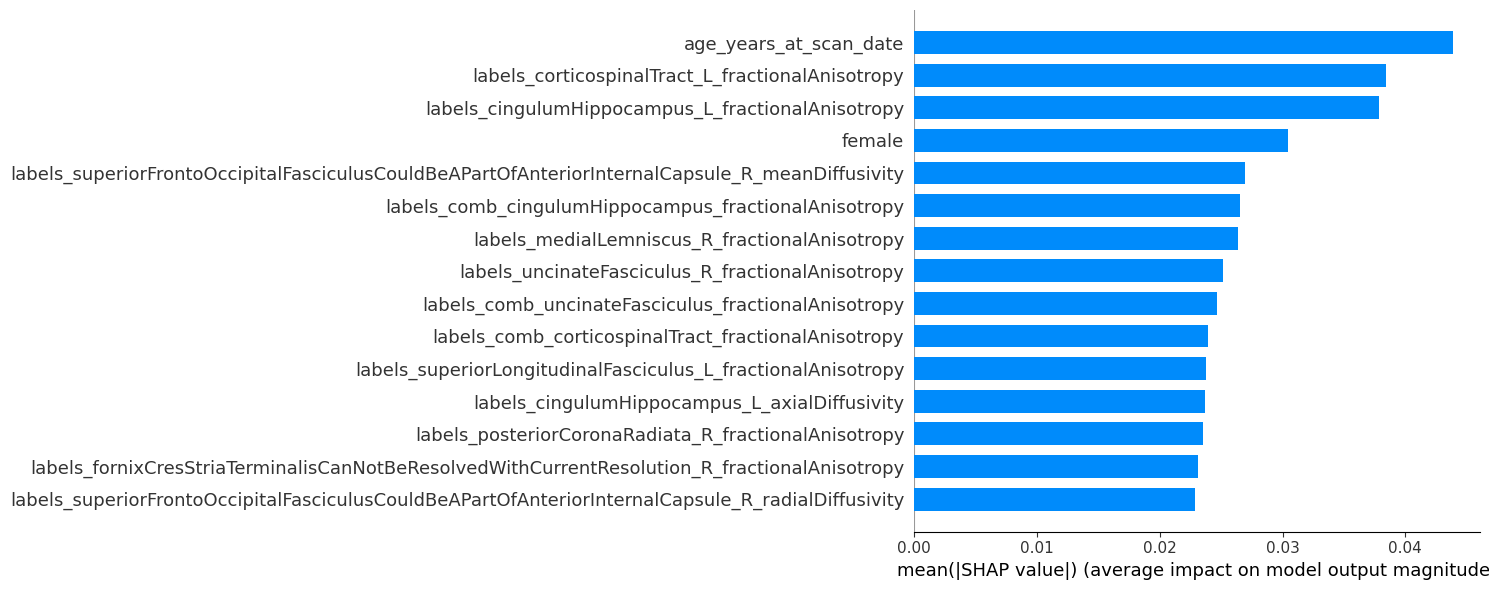

In [24]:
shap.summary_plot(shap_values_test, plot_type = 'bar',
                  feature_names=df_train.drop(['bipolar', 'subject_key', 'test', 'index'], axis=1).columns,
                  plot_size=[15,6], max_display=15, show=False)
# plt.savefig('shap_dif.png')

In [25]:
df_train.drop(['bipolar', 'subject_key', 'test', 'index'], axis=1).columns[
    np.argsort(np.abs(shap_values_test).mean(0))][-15::][::-1]

Index(['age_years_at_scan_date',
       'labels_corticospinalTract_L_fractionalAnisotropy',
       'labels_cingulumHippocampus_L_fractionalAnisotropy', 'female',
       'labels_superiorFrontoOccipitalFasciculusCouldBeAPartOfAnteriorInternalCapsule_R_meanDiffusivity',
       'labels_comb_cingulumHippocampus_fractionalAnisotropy',
       'labels_medialLemniscus_R_fractionalAnisotropy',
       'labels_uncinateFasciculus_R_fractionalAnisotropy',
       'labels_comb_uncinateFasciculus_fractionalAnisotropy',
       'labels_comb_corticospinalTract_fractionalAnisotropy',
       'labels_superiorLongitudinalFasciculus_L_fractionalAnisotropy',
       'labels_cingulumHippocampus_L_axialDiffusivity',
       'labels_posteriorCoronaRadiata_R_fractionalAnisotropy',
       'labels_fornixCresStriaTerminalisCanNotBeResolvedWithCurrentResolution_R_fractionalAnisotropy',
       'labels_superiorFrontoOccipitalFasciculusCouldBeAPartOfAnteriorInternalCapsule_R_radialDiffusivity'],
      dtype='object')

In [86]:
indices = np.argsort(np.abs(shap_values_test).mean(0))[-10::][::-1]
np.sort(np.abs(shap_values_test).mean(0))[-10::][::-1]

array([0.04388684, 0.03845617, 0.03785799, 0.03043062, 0.02691432,
       0.02653833, 0.02636361, 0.02516278, 0.02466713, 0.02395026])

### Cross-validation on training set

In [511]:
cv_acc = np.zeros(splits)
dif_output_master = pd.DataFrame()
for i in range(0, splits):
    svm = SVC(kernel="rbf", C=3, gamma='scale', class_weight='balanced').fit(X_cv_train[i], y_cv_train[i])  
    cv_acc[i] = svm.score(X_cv_test[i], y_cv_test[i])
    # Save output on test set
    dif_output = pd.DataFrame(svm.decision_function(X_cv_test[i]))
    dif_output.index = test_subjects[i]
    dif_output = dif_output.rename(columns={0:'dif_svm'})
    #dif_output.to_csv('dif_ab_cv'+str(i)+'.csv')
    dif_output_master = pd.concat([dif_output_master, dif_output])

In [512]:
cv_acc, cv_acc.mean()

(array([0.6       , 0.66666667, 0.6       , 0.8       , 0.46666667,
        0.6       , 0.66666667, 0.66666667, 0.64285714, 0.35714286]),
 0.6066666666666667)

In [513]:
dif_output_master.to_csv('dif_svm_cv.csv')

### Try model with only the 10 most important predictors

In [ ]:
df5 = df3[df_train.drop(['bipolar', 'subject_key', 'test', 'index'], axis=1).columns[indices]].copy()
X_train_small = df_train[df_train.drop(['bipolar', 'subject_key', 'test', 'index'], axis=1).columns[indices]].copy()
X_test_small = df_test[df_train.drop(['bipolar', 'subject_key', 'test', 'index'], axis=1).columns[indices]].copy()
y_train = df_train['bipolar']
y_test = df_test['bipolar']

X_train_small.shape, X_test_small.shape, len(y_train), len(y_test)

In [84]:
# Normalize X_train and X_test:
from sklearn.preprocessing import MinMaxScaler
X_train_small = np.array(X_train_small)
X_test_small = np.array(X_test_small)
scaler = MinMaxScaler()
X_train_small = scaler.fit_transform(X_train_small.reshape(-1, X_train_small.shape[-1])).reshape(X_train_small.shape)
X_test_small = scaler.transform(X_test_small.reshape(-1, X_test_small.shape[-1])).reshape(X_test_small.shape)

In [85]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=3, gamma='scale', class_weight='balanced', probability=True).fit(X_train_small, y_train)
svm.score(X_test_small, y_test)

0.5526315789473685

### Visualize the important predictors in the rbf SVM

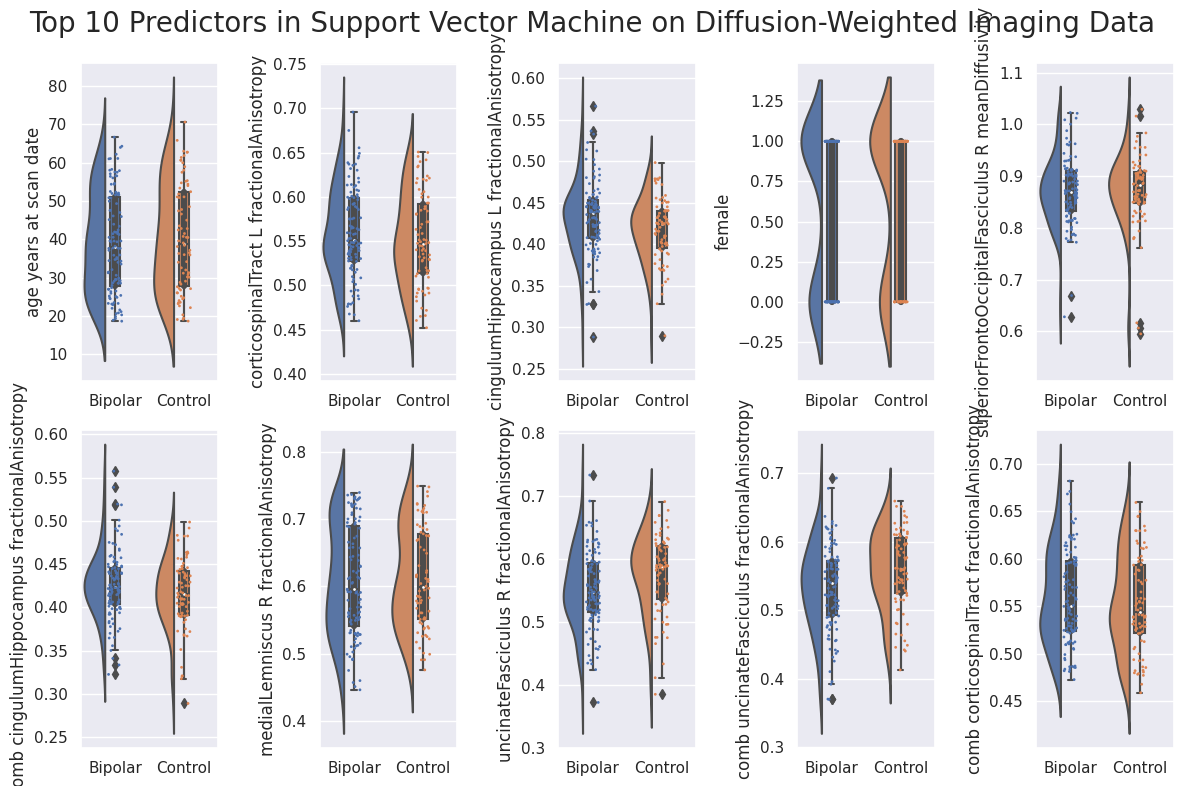

In [88]:
import math
import ptitprince as pt
import seaborn as sns

X = df3.drop(['bipolar', 'subject_key', 'test'], axis=1)
y = df3.bipolar
y3 = y.replace({0: 'Control', 1: 'Bipolar'})
y3.name = ''

names = list(X.columns)
i = 0
for name in names:
    name = name.replace('labels_', '')
    name = name.replace('CanNotBeResolvedWithCurrentResolution', '', 1)
    name = name.replace('_', ' ')
    name = name.replace('noddi labels', '')
    name = name.replace('wec.w', '\nwec.w')
    name = name.replace('NODDIEC', '\nNODDIEC')
    name = name.replace('ODI', '\nODI')
    name = name.replace('wcsf', '\nwcsf')
    name = name.replace('IncludeInferiorLongitidinalFasciculusAndInferiorFrontoOccipitalFasciculus', '')
    name = name.replace('CouldBeAPartOfAnteriorInternalCapsule', '')
    names[i] = name
    i += 1
X.columns = names

sns.set(style="darkgrid", font_scale=1)
fig, axes = plt.subplots(2, 5, sharey=False, figsize=(12,8))
j = 0
k = 0
for i in range(0, 10):
    j = math.floor(i/5)
    k = i - math.floor(i/5) * 5
    pt.half_violinplot(x=y3, y=X.columns[indices[i]], data=X.iloc[:,indices], ax=axes[j, k], width=.6)
    sns.stripplot(x=y3, y=X.columns[indices[i]], data=X.iloc[:,indices], ax=axes[j, k], s=2)
    sns.boxplot(x=y3, y=X.columns[indices[i]], data=X.iloc[:,indices], ax=axes[j, k], width = .15)
    
fig.suptitle('Top 10 Predictors in Support Vector Machine on Diffusion-Weighted Imaging Data', fontsize=20)
fig.tight_layout()
plt.show()

### Metrics

In [543]:
predicted = svm.predict(X_test)
actual = np.array(y_test)
predicted, actual

(array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [544]:
results = np.empty(len(predicted)).tolist()
for i in range(0, len(predicted)):
    if predicted[i]==1 and actual[i]==1:
        results[i] = 'tp'
    if predicted[i]==0 and actual[i]==1:
        results[i] = 'fn'
    if predicted[i]==1 and actual[i]==0:
        results[i] = 'fp'
    if predicted[i]==0 and actual[i]==0:
        results[i] = 'tn'
np.array(results)

array(['tp', 'tp', 'fn', 'tp', 'fn', 'fn', 'tp', 'tp', 'tp', 'tp', 'tp',
       'fn', 'tp', 'tp', 'tp', 'tp', 'fn', 'tp', 'tp', 'tp', 'fn', 'tn',
       'tn', 'tn', 'tn', 'fp', 'tn', 'tn', 'fp', 'tn', 'tn', 'tn', 'tn',
       'tn', 'tn', 'fp', 'tn', 'tn'], dtype='<U2')

In [545]:
tp = results.count('tp')
fp = results.count('fp')
tn = results.count('tn')
fn = results.count('fn')
print('Sensitivity: ' + str(tp/(tp+fn)))
print('Specificity: ' + str(tn/(tn+fp)))
print('PPV: ' + str(tp/(tp+fp)))
print('NPV: ' + str(tn/(tn+fn)))

Sensitivity: 0.7142857142857143
Specificity: 0.8235294117647058
PPV: 0.8333333333333334
NPV: 0.7


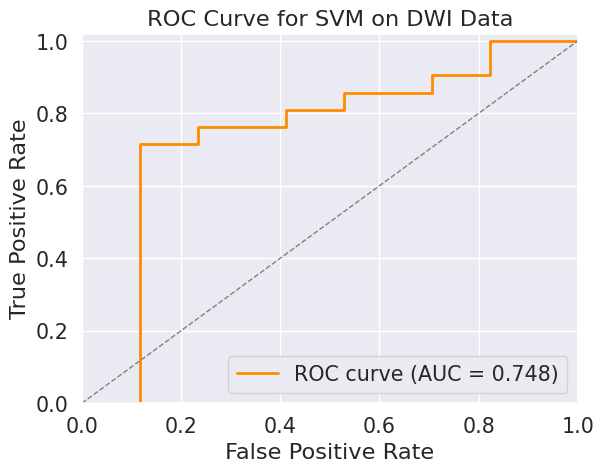

In [546]:
from dython.model_utils import metric_graph
import seaborn as sns

svm1 = svm.decision_function(X_test)[:] # predicted probability of bipolar

sns.set(style="darkgrid", font_scale=1.35)
metric_graph(actual, svm1, metric='roc', fmt='.3f', title='ROC Curve for SVM on DWI Data',
             legend='lower right', eopt=False)
plt.show()

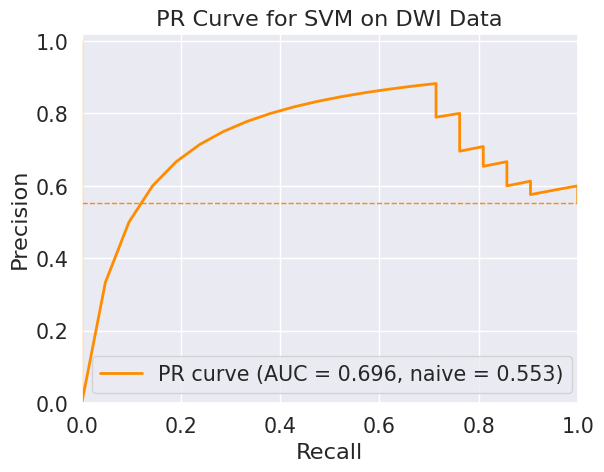

In [547]:
metric_graph(actual, svm1, metric='pr', fmt='.3f', title='PR Curve for SVM on DWI Data',
             legend='lower left', eopt=False) # naive precision/AUC is proportion of bipolar in data.
# precision=PPV, recall=sensitivity
plt.show()

In [548]:
p = metric_graph(actual, svm1, metric='pr', plot=False)['0']['eopt']['y']
r = metric_graph(actual, svm1, metric='pr', plot=False)['0']['eopt']['x']
F1 = 2*p*r/(p+r)
F1 # F1 score (harmonic mean of precision and recall):

0.7894736842105262

### Other types of SVM

In [48]:
# SVM with linear kernel
svm = SVC(kernel="linear", C=0.8, class_weight={0:1.5,1:1}).fit(X_train2, y_train2)
svm.score(X_val, y_val)

0.5

In [49]:
# SVM with polynomial kernel
svm = SVC(kernel="poly", C=0.1, degree=2, gamma=0.1).fit(X_train2, y_train2)
svm.score(X_val, y_val)

0.6

In [50]:
# SVM with sigmoid kernel
svm = SVC(kernel="sigmoid", C=5, gamma='scale').fit(X_train2, y_train2)
svm.score(X_val, y_val)

0.5

# Neural networks

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [52]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
y_train2 = np.array(y_train2)

x = torch.from_numpy(X_train)
y = torch.from_numpy(y_train)
x = x.type(torch.FloatTensor)
y = y.type(torch.LongTensor)
xtest = torch.from_numpy(X_test)
ytest = torch.from_numpy(y_test)
xtest = xtest.type(torch.FloatTensor)
ytest = ytest.type(torch.LongTensor)
xval = torch.from_numpy(X_val)
yval = torch.from_numpy(y_val)
xval = xval.type(torch.FloatTensor)
yval = yval.type(torch.LongTensor)
x2 = torch.from_numpy(X_train2)
y2 = torch.from_numpy(y_train2)
x2 = x2.type(torch.FloatTensor)
y2 = y2.type(torch.LongTensor)

## Single layer neural network

In [209]:
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x

In [ ]:
# Run next 4 cells together each time.

torch.manual_seed(5) #random seed

net = OurNet(n_feature=278, n_hidden=250, n_output=2) 
print(net)

In [211]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.035, momentum=0.9)
loss_func = torch.nn.CrossEntropyLoss()
epochs = 250

train_error = np.zeros(epochs)
validation_error = np.zeros(epochs)
train_misclass = np.zeros(epochs)
validation_misclass = np.zeros(epochs)

for t in range(epochs):
    out = net(x2)
    outnp = out.detach().numpy()
    loss = loss_func(out, y2)
    out_test = net(xval)
    outnp_test = out_test.detach().numpy()
    loss_test = loss_func(out_test, yval)
    train_error[t] = loss.detach().numpy()
    train_misclass[t] = (np.argmax(outnp, axis=1) != y2.numpy()).mean() * 100
    validation_error[t] = loss_test.detach().numpy()
    validation_misclass[t] = (np.argmax(outnp_test, axis=1) != yval.numpy()).mean() * 100
    optimizer.zero_grad()
    loss.backward()   
    optimizer.step()


(0.6557777523994446, 133)

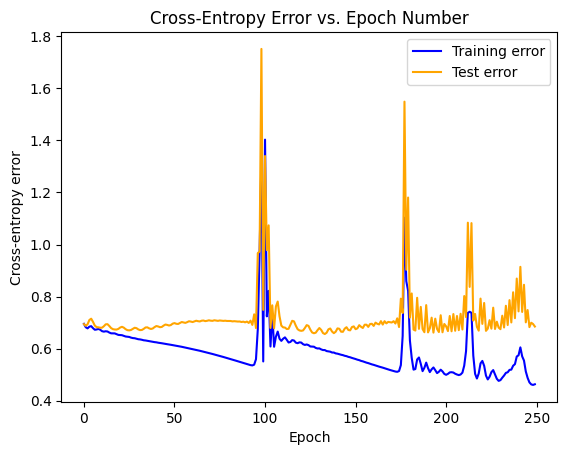

In [212]:
epoch = range(epochs)
plt.plot(epoch, train_error, c='blue')
plt.plot(epoch, validation_error, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy error')
plt.title('Cross-Entropy Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest cross-entropy validation error and number of epochs to achieve:
validation_error.min(), validation_error.argmin() 

(28.947368421052634, 89)

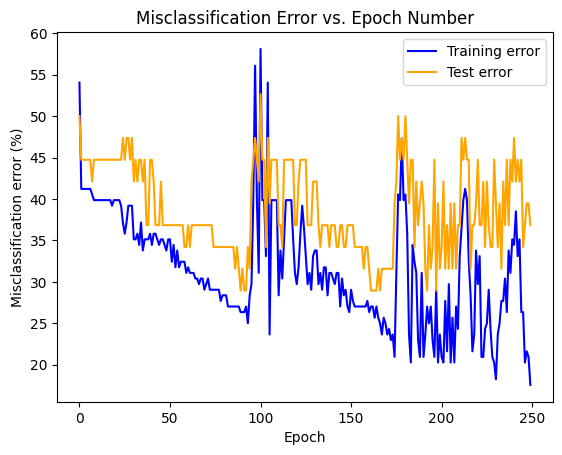

In [213]:
plt.plot(epoch, train_misclass, c='blue')
plt.plot(epoch, validation_misclass, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Misclassification error (%)')
plt.title('Misclassification Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest misclassification percentage and number of epochs to achieve:
validation_misclass.min(), validation_misclass.argmin() 

## Neural network with 2 hidden layers

In [164]:
class Net2(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net2, self).__init__()     
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1) 
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.out = torch.nn.Linear(n_hidden2, n_output)
        
    def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x

In [ ]:
# Run next 4 cells together each time.

torch.manual_seed(5) #random seed

net = Net2(n_feature=278, n_hidden1=250, n_hidden2=250, n_output=2) 
print(net)

In [166]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.03, momentum=0.9)
loss_func = torch.nn.CrossEntropyLoss()
epochs = 250

train_error = np.zeros(epochs)
validation_error = np.zeros(epochs)
train_misclass = np.zeros(epochs)
validation_misclass = np.zeros(epochs)

for t in range(epochs):
    out = net(x2)
    outnp = out.detach().numpy()
    loss = loss_func(out, y2)
    out_test = net(xval)
    outnp_test = out_test.detach().numpy()
    loss_test = loss_func(out_test, yval)
    train_error[t] = loss.detach().numpy()
    train_misclass[t] = (np.argmax(outnp, axis=1) != y2.numpy()).mean() * 100
    validation_error[t] = loss_test.detach().numpy()
    validation_misclass[t] = (np.argmax(outnp_test, axis=1) != yval.numpy()).mean() * 100
    optimizer.zero_grad()
    loss.backward()   
    optimizer.step()


(0.6629598140716553, 59)

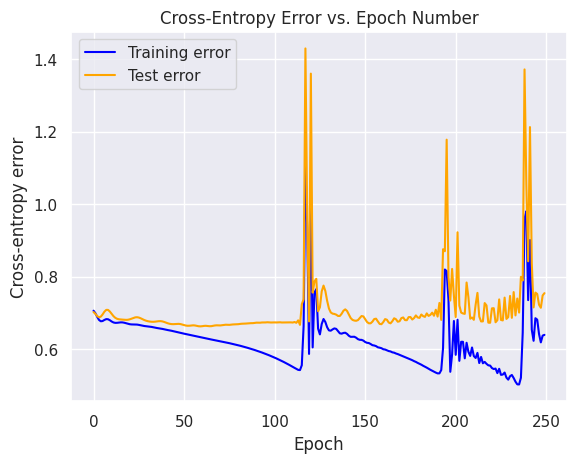

In [167]:
epoch = range(epochs)
plt.plot(epoch, train_error, c='blue')
plt.plot(epoch, validation_error, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy error')
plt.title('Cross-Entropy Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest cross-entropy validation error and number of epochs to achieve:
validation_error.min(), validation_error.argmin()

(28.947368421052634, 113)

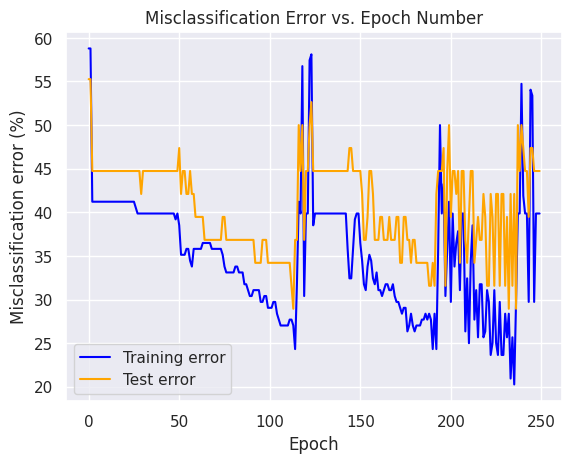

In [168]:
plt.plot(epoch, train_misclass, c='blue')
plt.plot(epoch, validation_misclass, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Misclassification error (%)')
plt.title('Misclassification Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest misclassification percentage and number of epochs to achieve:
validation_misclass.min(), validation_misclass.argmin()